# EDA and Data Cleaning 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 

In [3]:
df = pd.read_excel("1.xlsx")
df.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(522064, 7)

In [5]:
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [6]:
print("Current Data Types:")
print(df.dtypes)

Current Data Types:
BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object


# 1. Handling NA Values

In [7]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [8]:
(df.isnull().sum() / len(df)) * 100

BillNo         0.000000
Itemname       0.278701
Quantity       0.000000
Date           0.000000
Price          0.000000
CustomerID    25.675205
Country        0.000000
dtype: float64

In [9]:
df['Itemname'] = df['Itemname'].fillna('Unknown')
df['CustomerID'] = df['CustomerID'].fillna('Guest')

In [10]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

# 2. Handling Duplicates  

In [11]:
df.duplicated().sum()

5286

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.describe()

,Quantity,Date,Price
count,516778.00000,516778,516778.000000
mean,10.16247,2011-07-04 08:18:39.177790464,3.841504
min,-9600.00000,2010-12-01 08:26:00,-11062.060000
25%,1.00000,2011-03-28 09:59:00,1.250000
50%,3.00000,2011-07-19 14:29:00,2.080000
75%,10.00000,2011-10-19 12:11:00,4.130000
max,80995.00000,2011-12-09 12:50:00,13541.330000
std,161.91653,NaN,42.113493


# 3. Handling Negative Values 

In [14]:
df[df.Price<0].shape

(2, 7)

In [15]:
df[df.Price<0]["Price"].unique()

array([-11062.06])

In [16]:
df["Price"] = abs(df["Price"])
df["Price"].describe()

count    516778.000000
mean          3.927127
std          42.105595
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: Price, dtype: float64

In [17]:
df[df.Quantity<0].shape

(1336, 7)

In [18]:
df[df.Quantity<0]["Quantity"].unique()

array([  -10,   -38,   -20,    -6,   -22,    -2,   -30,   -70,  -130,
         -80,  -120,   -40,    -5,   -12,   -25,   -14,   -15,   -69,
          -3,  -140,  -320,   -24,   -35,   -21,   -43,   -19,   -11,
         -18,   -44,   -50,    -9,   -77,  -223,    -4,    -1,  -150,
         -13,  -723,  -177,   -32,  -100,   -28,  -145,   -36,   -48,
        -106,   -60,  -939,   -54,  -201,   -53,   -29, -2600,  -990,
          -8,  -290,   -45,  -310,   -61,   -41,   -64,   -84, -1400,
        -300,   -57,   -59,   -16,   -31,   -17,  -207,   -52,  -206,
        -217, -1430,  -162,  -230,  -173,  -390,  -234,   -42,    -7,
         -99,   -92,  -741,  -400,  -114,   -88,   -33,  -391,   -87,
        -278,  -154, -3000,  -675,  -600,  -210,  -345,  -975, -1200,
       -1121,   -27,  -541, -1277,  -197, -1100,   -63, -5368,  -259,
         -82,  -178,  -110,   -47,  -323,  -450,  -232,   -83,  -153,
        -524, -2472,  -105,   -34,   -46,   -75,  -690,   -39,   -66,
        -180,  -194,

In [19]:
df["Quantity"] = abs(df["Quantity"])
df["Quantity"].describe()

count    516778.000000
mean         10.963421
std         161.864270
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [20]:
df.describe()

,Quantity,Date,Price
count,516778.000000,516778,516778.000000
mean,10.963421,2011-07-04 08:18:39.177790464,3.927127
min,1.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 09:59:00,1.250000
50%,3.000000,2011-07-19 14:29:00,2.080000
75%,10.000000,2011-10-19 12:11:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,161.864270,NaN,42.105595


# 3.1 Visualizing Quantity and Price

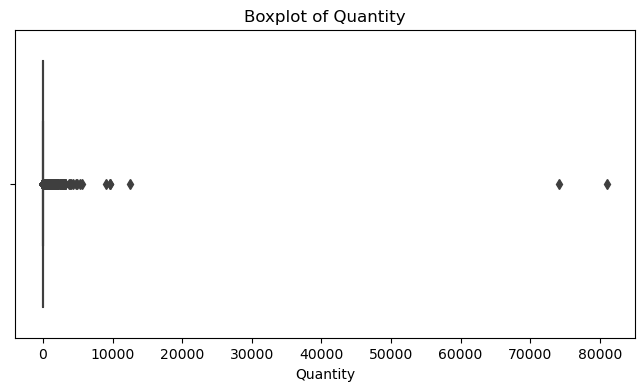

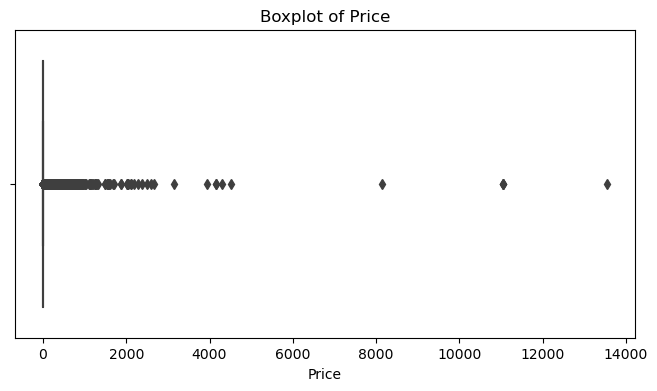

In [21]:
#Box plot for Quantiy
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

#Box plot for Price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

# 4. Handling Outliers Using IQR and Log Transformation

In [22]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1 

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound


outliers_quantity, lower_quantity, upper_quantity = identify_outliers_iqr(df, 'Quantity')
outliers_price, lower_price, upper_price = identify_outliers_iqr(df, 'Price')


print(f"Quantity - Lower Bound: {lower_quantity}, Upper Bound: {upper_quantity}")
print(f"Number of outliers in Quantity: {len(outliers_quantity)}")
print(outliers_quantity.head())

print(f"\nPrice - Lower Bound: {lower_price}, Upper Bound: {upper_price}")
print(f"Number of outliers in Price: {len(outliers_price)}")
print(outliers_price.head())


Quantity - Lower Bound: -12.5, Upper Bound: 23.5
Number of outliers in Quantity: 55027
    BillNo                       Itemname  Quantity                Date  \
9   536367  ASSORTED COLOUR BIRD ORNAMENT        32 2010-12-01 08:34:00   
26  536370      ALARM CLOCK BAKELIKE PINK        24 2010-12-01 08:45:00   
27  536370       ALARM CLOCK BAKELIKE RED        24 2010-12-01 08:45:00   
30  536370                STARS GIFT TAPE        24 2010-12-01 08:45:00   
31  536370     INFLATABLE POLITICAL GLOBE        48 2010-12-01 08:45:00   

    Price CustomerID         Country  
9    1.69    13047.0  United Kingdom  
26   3.75    12583.0          France  
27   3.75    12583.0          France  
30   0.65    12583.0          France  
31   0.85    12583.0          France  

Price - Lower Bound: -3.0700000000000003, Upper Bound: 8.45
Number of outliers in Price: 36771
     BillNo                         Itemname  Quantity                Date  \
16   536367   BOX OF VINTAGE ALPHABET BLOCKS         2

In [23]:
def cap_outliers(df, column, multiplier=2.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

   
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = cap_outliers(df, 'Quantity', multiplier=2.0)
df = cap_outliers(df, 'Price', multiplier=2.0)


In [24]:
# log transformation for capped data
df['Quantity_Log'] = np.log1p(df['Quantity'])
df['Price_Log'] = np.log1p(df['Price'])


In [25]:
# Flag remaining outliers for future analysis
df['Quantity_Outlier'] = ((df['Quantity'] < lower_quantity) | (df['Quantity'] > upper_quantity)).astype(int)
df['Price_Outlier'] = ((df['Price'] < lower_price) | (df['Price'] > upper_price)).astype(int)

print(df[['Quantity', 'Quantity_Outlier', 'Price', 'Price_Outlier']].head())


   Quantity  Quantity_Outlier  Price  Price_Outlier
0       6.0                 0   2.55              0
1       6.0                 0   3.39              0
2       8.0                 0   2.75              0
3       6.0                 0   3.39              0
4       6.0                 0   3.39              0


In [26]:
df.describe()

,Quantity,Date,Price,Quantity_Log,Price_Log,Quantity_Outlier,Price_Outlier
count,516778.000000,516778,516778.000000,516778.000000,516778.000000,516778.000000,516778.000000
mean,6.971270,2011-07-04 08:18:39.177790464,3.027514,1.665095,1.213724,0.106481,0.071154
min,1.000000,2010-12-01 08:26:00,0.000000,0.693147,0.000000,0.000000,0.000000
25%,1.000000,2011-03-28 09:59:00,1.250000,0.693147,0.810930,0.000000,0.000000
50%,3.000000,2011-07-19 14:29:00,2.080000,1.386294,1.124930,0.000000,0.000000
75%,10.000000,2011-10-19 12:11:00,4.130000,2.397895,1.635106,0.000000,0.000000
max,28.000000,2011-12-09 12:50:00,9.890000,3.367296,2.387845,1.000000,1.000000
std,7.835021,NaN,2.601710,0.880921,0.586103,0.308452,0.257083


# 4.1 Handling Zero Values

In [27]:
zero_quantity = (df['Quantity'] == 0).sum()
zero_price = (df['Price'] == 0).sum()

print(f"Number of rows with Quantity = 0: {zero_quantity}")
print(f"Number of rows with Price = 0: {zero_price}")

Number of rows with Quantity = 0: 0
Number of rows with Price = 0: 2506


In [28]:
zero_price_rows = df[(df['Price'] == 0)]
zero_price_rows


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Quantity_Log,Price_Log,Quantity_Outlier,Price_Outlier
613,536414,Unknown,28.0,2010-12-01 11:52:00,0.0,Guest,United Kingdom,3.367296,0.0,1,0
1937,536545,Unknown,1.0,2010-12-01 14:32:00,0.0,Guest,United Kingdom,0.693147,0.0,0,0
1938,536546,Unknown,1.0,2010-12-01 14:33:00,0.0,Guest,United Kingdom,0.693147,0.0,0,0
1939,536547,Unknown,1.0,2010-12-01 14:33:00,0.0,Guest,United Kingdom,0.693147,0.0,0,0
1940,536549,Unknown,1.0,2010-12-01 14:34:00,0.0,Guest,United Kingdom,0.693147,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
517266,581234,Unknown,27.0,2011-12-08 10:33:00,0.0,Guest,United Kingdom,3.332205,0.0,1,0
518770,581406,POLYESTER FILLER PAD 45x45cm,28.0,2011-12-08 13:58:00,0.0,Guest,United Kingdom,3.367296,0.0,1,0
518771,581406,POLYESTER FILLER PAD 40x40cm,28.0,2011-12-08 13:58:00,0.0,Guest,United Kingdom,3.367296,0.0,1,0
518820,581408,Unknown,20.0,2011-12-08 14:06:00,0.0,Guest,United Kingdom,3.044522,0.0,0,0


In [29]:
unknown_price_zero_records = df[(df['Itemname'] == 'Unknown') & (df['Price'] == 0.0)]
num_unknown_price_zero_records = unknown_price_zero_records.shape[0]
print(f"Number of Unknown records with Price = 0: {num_unknown_price_zero_records}")


Number of Unknown records with Price = 0: 1455


In [30]:
unique_itemnames_price_zero = df[df['Price'] == 0]['Itemname'].nunique()

print(f"Number of unique Itemnames with Price = 0: {unique_itemnames_price_zero}")


Number of unique Itemnames with Price = 0: 373


# 4.2 Removing where Price = 0 and Itemname = Unknown

In [31]:
df = df[~((df['Itemname'] == 'Unknown') & (df['Price'] == 0))]

In [32]:
unknown_price_zero_records = df_cleaned[(df_cleaned['Itemname'] == 'Unknown') & (df_cleaned['Price'] == 0.0)]

num_unknown_price_zero_records = unknown_price_zero_records.shape[0]
print(f"Number of Unknown records with Price = 0: {num_unknown_price_zero_records}")


NameError: name 'df_cleaned' is not defined

# 4.3 Imputing the value where Itemname = Unique and Price = 0

In [33]:
median_price = df[df['Price'] > 0]['Price'].median()
df.loc[df['Price'] == 0, 'Price'] = median_price

In [34]:
unique_itemnames_price_zero = df[df['Price'] == 0]['Itemname'].nunique()

print(f"Number of unique Itemnames with Price = 0: {unique_itemnames_price_zero}")


Number of unique Itemnames with Price = 0: 0


In [35]:
zero_price = (df['Price'] == 0).sum()

print(f"Number of rows with Price = 0: {zero_price}")

Number of rows with Price = 0: 0


In [36]:
df.describe()

,Quantity,Date,Price,Quantity_Log,Price_Log,Quantity_Outlier,Price_Outlier
count,515323.000000,515323,515323.000000,515323.000000,515323.000000,515323.000000,515323.000000
mean,6.949911,2011-07-04 11:11:17.317022720,3.040305,1.663177,1.217151,0.105757,0.071355
min,1.000000,2010-12-01 08:26:00,0.001000,0.693147,0.000000,0.000000,0.000000
25%,1.000000,2011-03-28 10:14:00,1.250000,0.693147,0.810930,0.000000,0.000000
50%,3.000000,2011-07-19 15:55:00,2.080000,1.386294,1.124930,0.000000,0.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,2.397895,1.635106,0.000000,0.000000
max,28.000000,2011-12-09 12:50:00,9.890000,3.367296,2.387845,1.000000,1.000000
std,7.813260,NaN,2.597133,0.879817,0.583366,0.307527,0.257418


# 4.5 Visualization

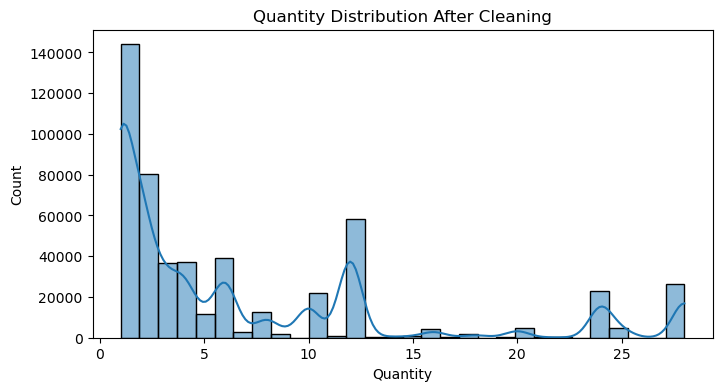

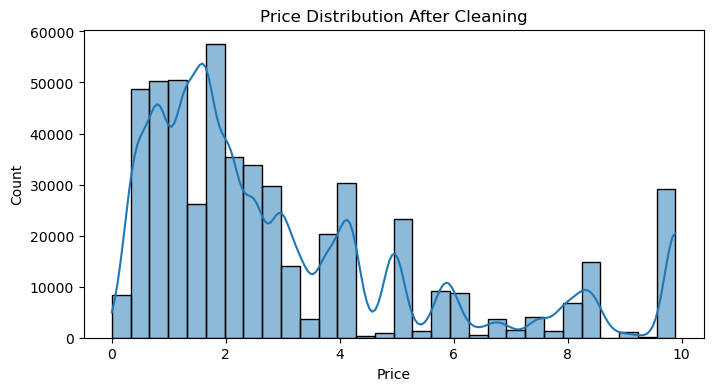

In [37]:
# Histogram for 'Quantity'
plt.figure(figsize=(8, 4))
sns.histplot(df['Quantity'], kde=True, bins=30)
plt.title('Quantity Distribution After Cleaning')
plt.show()

# Histogram for 'Price'
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution After Cleaning')
plt.show()


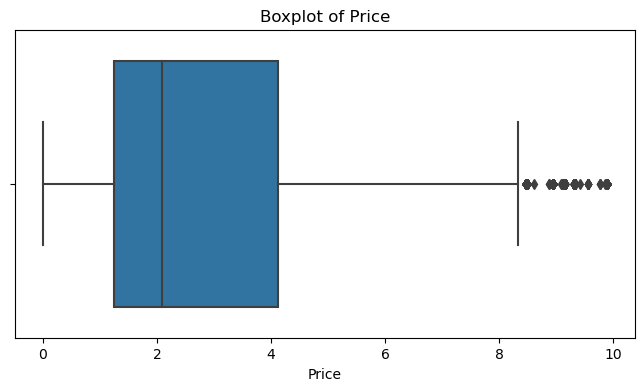

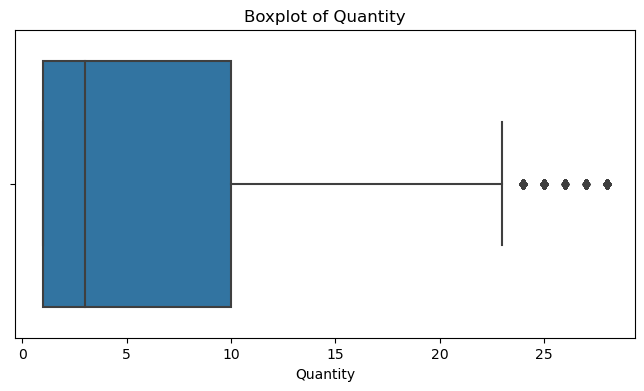

In [38]:
# Boxplot for 'Price'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

# Boxplot for 'Quantity'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

# 5. Feature Engineering 

#  5.1 Creating a new column 

In [39]:
# Creating a new column 'TotalPrice' as Quantity * Price
df['TotalPrice'] = df['Quantity'] * df['Price']

print("\nData with TotalPrice:")
print(df[['Quantity', 'Price', 'TotalPrice']].head())


Data with TotalPrice:
   Quantity  Price  TotalPrice
0       6.0   2.55       15.30
1       6.0   3.39       20.34
2       8.0   2.75       22.00
3       6.0   3.39       20.34
4       6.0   3.39       20.34


# 5.2 Month or Weekday

In [40]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting the Month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Extracting the Weekday from the 'Date' column
df['Weekday'] = df['Date'].dt.day_name()

print("\nData with Month and Weekday:")
print(df[['Date', 'Month', 'Weekday']].head())


Data with Month and Weekday:
                 Date  Month    Weekday
0 2010-12-01 08:26:00     12  Wednesday
1 2010-12-01 08:26:00     12  Wednesday
2 2010-12-01 08:26:00     12  Wednesday
3 2010-12-01 08:26:00     12  Wednesday
4 2010-12-01 08:26:00     12  Wednesday


In [41]:
df.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Quantity_Log,Price_Log,Quantity_Outlier,Price_Outlier,TotalPrice,Month,Weekday
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.945910,1.266948,0,0,15.30,12,Wednesday
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,12,Wednesday
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2.197225,1.321756,0,0,22.00,12,Wednesday
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,12,Wednesday
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,12,Wednesday


# 6. Aggregating Data

# 6.1 Monthly Revenue

In [42]:
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
print("\nMonthly Revenue:")
print(monthly_revenue)


Monthly Revenue:
Month
1      435218.100
2      369428.590
3      487570.890
4      387789.991
5      540931.470
6      481555.140
7      483236.081
8      498041.590
9      715219.672
10     790606.420
11    1066287.640
12     895179.550
Name: TotalPrice, dtype: float64


# 6.2 Weekday Sales

In [43]:
weekday_sales = df.groupby('Weekday')['TotalPrice'].sum().sort_index()
print("\nSales by Weekday:")
print(weekday_sales)



Sales by Weekday:
Weekday
Friday       1151137.751
Monday       1193366.101
Sunday        671299.591
Thursday     1471141.180
Tuesday      1377614.651
Wednesday    1286505.860
Name: TotalPrice, dtype: float64


# 6.3 Aggregating by CustomerID

In [44]:
customer_summary = df.groupby('CustomerID').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalTransactions=('BillNo', 'nunique'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

print("\nCustomer Summary:")
print(customer_summary.head())


Customer Summary:
  CustomerID  TotalRevenue  TotalTransactions  TotalQuantity
0    12346.0         29.12                  1           28.0
1    12347.0       3942.88                  7         2176.0
2    12349.0       1385.83                  1          615.0
3    12350.0        304.29                  1          197.0
4    12352.0       1469.80                  8          536.0


# 6.4  Aggregating by Itemname

In [45]:
product_summary = df.groupby('Itemname').agg(
    TotalSales=('TotalPrice', 'sum'),
    TotalQuantitySold=('Quantity', 'sum'),
    AvgPrice=('Price', 'mean')
).reset_index()

print("\nProduct Summary:")
print(product_summary.head())


Product Summary:
                     Itemname  TotalSales  TotalQuantitySold  AvgPrice
0       *Boombox Ipod Classic        9.89                1.0  9.890000
1     *USB Office Mirror Ball       16.94                2.0  8.470000
2      10 COLOUR SPACEBOY PEN     4232.65             4844.0  1.059904
3  12 COLOURED PARTY BALLOONS     1234.71             1882.0  0.705276
4   12 DAISY PEGS IN WOOD BOX      513.42              296.0  1.930519


# 6.5 Aggregating by Country

In [46]:
country_summary = df.groupby('Country').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    UniqueCustomers=('CustomerID', 'nunique'),
    TotalTransactions=('BillNo', 'nunique')
).reset_index()

print("\nCountry Summary:")
print(country_summary.head())



Country Summary:
     Country  TotalRevenue  UniqueCustomers  TotalTransactions
0  Australia      50768.30                9                 57
1    Austria       8143.23               11                 17
2    Bahrain        523.88                3                  3
3    Belgium      37028.51               25                 98
4     Brazil       1126.64                1                  1


# 6.6 Monthly Summary

In [47]:
monthly_summary = df.groupby('Month').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalTransactions=('BillNo', 'nunique')
).reset_index()

print("\nMonthly Sales Summary:")
print(monthly_summary)


Monthly Sales Summary:
    Month  TotalRevenue  TotalTransactions
0       1    435218.100               1091
1       2    369428.590               1086
2       3    487570.890               1466
3       4    387789.991               1261
4       5    540931.470               1684
5       6    481555.140               1555
6       7    483236.081               1468
7       8    498041.590               1348
8       9    715219.672               1847
9      10    790606.420               2120
10     11   1066287.640               2890
11     12    895179.550               2392


# 6.7 Weekday Summary  

In [48]:
weekday_summary = df.groupby('Weekday').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    AvgTransactionValue=('TotalPrice', 'mean')
).reset_index()

print("\nWeekday Sales Summary:")
print(weekday_summary)



Weekday Sales Summary:
     Weekday  TotalRevenue  AvgTransactionValue
0     Friday   1151137.751            14.777880
1     Monday   1193366.101            13.183889
2     Sunday    671299.591            10.876709
3   Thursday   1471141.180            14.982749
4    Tuesday   1377614.651            14.171241
5  Wednesday   1286505.860            14.327941


# 6.8 Sorting Summary  

In [49]:
# Sorting customer summary by TotalRevenue (descending)
customer_summary = customer_summary.sort_values(by='TotalRevenue', ascending=False)

# Sorting product summary by TotalSales (descending)
product_summary = product_summary.sort_values(by='TotalSales', ascending=False)

print("\nTop Customers by Revenue:")
print(customer_summary.head())

print("\nTop Products by Sales:")
print(product_summary.head())



Top Customers by Revenue:
     CustomerID  TotalRevenue  TotalTransactions  TotalQuantity
4297      Guest    1249807.53               2045       374696.0
1661    14646.0      92248.47                 74        49431.0
539     13089.0      49845.71                 97        25619.0
1264    14096.0      48801.30                 17        15703.0
4160    18102.0      45630.83                 60        10894.0

Top Products by Sales:
                                Itemname  TotalSales  TotalQuantitySold  \
2884            REGENCY CAKESTAND 3 TIER   104759.23            10621.0   
2445                       PARTY BUNTING    66887.54            12256.0   
3882  WHITE HANGING HEART T-LIGHT HOLDER    60001.97            20779.0   
1842             JUMBO BAG RED RETROSPOT    46893.52            21944.0   
2414      PAPER CHAIN KIT 50'S CHRISTMAS    36525.23            11145.0   

      AvgPrice  
2884  9.877241  
2445  5.679521  
3882  3.225693  
1842  2.491646  
2414  3.370051  


# 7. Insights


# 7.1 Sales Trends


Daily Sales Trends:
                 Date  TotalRevenue  TotalTransactions
0 2010-12-01 08:26:00        139.12                  1
1 2010-12-01 08:28:00         22.20                  1
2 2010-12-01 08:34:00        341.90                  2
3 2010-12-01 08:35:00         17.85                  1
4 2010-12-01 08:45:00        809.33                  1


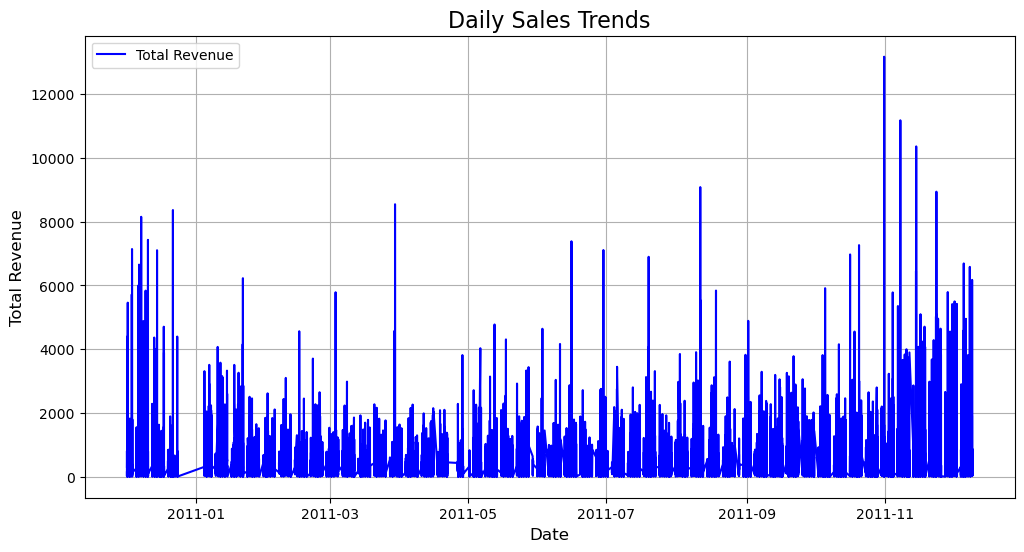

In [50]:
# Daily Sales Trends
# Grouping by Date to calculate daily revenue
daily_sales = df.groupby('Date').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalTransactions=('BillNo', 'nunique')
).reset_index()

print("\nDaily Sales Trends:")
print(daily_sales.head())

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['TotalRevenue'], label='Total Revenue', color='blue')
plt.title('Daily Sales Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend()
plt.grid()
plt.show()



Weekly Sales Trends:
   Week  TotalRevenue  TotalTransactions
0     1      99585.96                244
1     2     107644.81                264
2     3     105215.62                231
3     4     104048.72                290
4     5      93928.35                298


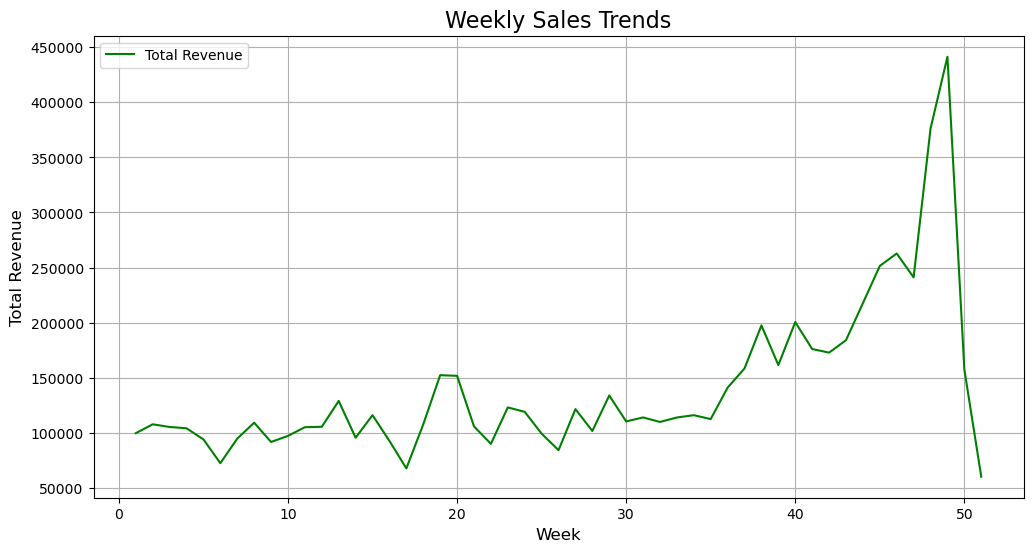

In [51]:
# weekly Sales Trends

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Week'] = df['Date'].dt.isocalendar().week

weekly_sales = df.groupby('Week').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalTransactions=('BillNo', 'nunique')
).reset_index()


print("\nWeekly Sales Trends:")
print(weekly_sales.head())


plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['TotalRevenue'], label='Total Revenue', color='green')
plt.title('Weekly Sales Trends', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend()
plt.grid()
plt.show()


Monthly Sales Trends:
    Month  TotalRevenue  TotalTransactions
0       1    435218.100               1091
1       2    369428.590               1086
2       3    487570.890               1466
3       4    387789.991               1261
4       5    540931.470               1684
5       6    481555.140               1555
6       7    483236.081               1468
7       8    498041.590               1348
8       9    715219.672               1847
9      10    790606.420               2120
10     11   1066287.640               2890
11     12    895179.550               2392


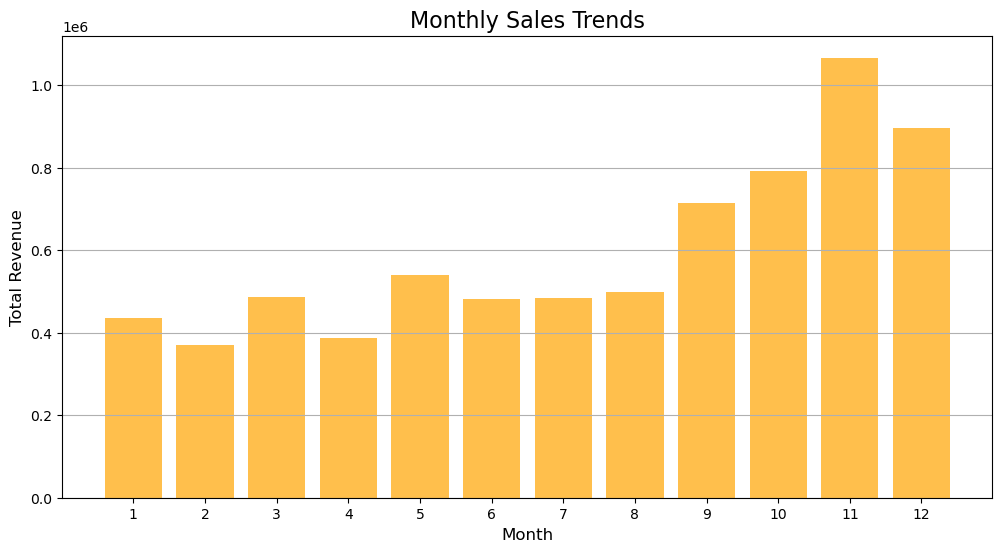

In [52]:
#Monthly Sales Trends
# Creating a 'Month' column for monthly grouping
df['Month'] = df['Date'].dt.month

# Grouping by Month to calculate monthly revenue
monthly_sales = df.groupby('Month').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalTransactions=('BillNo', 'nunique')
).reset_index()


print("\nMonthly Sales Trends:")
print(monthly_sales)


plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Month'], monthly_sales['TotalRevenue'], color='orange', alpha=0.7)
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(range(1, 13)) 
plt.grid(axis='y')
plt.show()



In [53]:
#Identifying Seasonal Peaks and Dips

peak_days = daily_sales[daily_sales['TotalRevenue'] == daily_sales['TotalRevenue'].max()]
print("\nPeak Sales Days:")
print(peak_days)


low_days = daily_sales[daily_sales['TotalRevenue'] == daily_sales['TotalRevenue'].min()]
print("\nLowest Sales Days:")
print(low_days)


peak_month = monthly_sales[monthly_sales['TotalRevenue'] == monthly_sales['TotalRevenue'].max()]
print("\nMonth with Highest Sales:")
print(peak_month)


Peak Sales Days:
                     Date  TotalRevenue  TotalTransactions
15295 2011-10-31 14:41:00      13177.03                  1

Lowest Sales Days:
                     Date  TotalRevenue  TotalTransactions
13982 2011-10-11 11:02:00          0.38                  1

Month with Highest Sales:
    Month  TotalRevenue  TotalTransactions
10     11    1066287.64               2890


# 7.2 Top Performing Products 

In [54]:
# Aggregating data by Itemname to calculate total revenue and total quantity sold
product_performance = df.groupby('Itemname').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalQuantitySold=('Quantity', 'sum'),
    AvgPrice=('Price', 'mean')
).reset_index()

print("\nProduct Performance:")
print(product_performance.head())



Product Performance:
                     Itemname  TotalRevenue  TotalQuantitySold  AvgPrice
0       *Boombox Ipod Classic          9.89                1.0  9.890000
1     *USB Office Mirror Ball         16.94                2.0  8.470000
2      10 COLOUR SPACEBOY PEN       4232.65             4844.0  1.059904
3  12 COLOURED PARTY BALLOONS       1234.71             1882.0  0.705276
4   12 DAISY PEGS IN WOOD BOX        513.42              296.0  1.930519


In [55]:
# Sorting by TotalRevenue in descending order
top_revenue_products = product_performance.sort_values(by='TotalRevenue', ascending=False)

# Sorting by TotalQuantitySold in descending order
top_quantity_products = product_performance.sort_values(by='TotalQuantitySold', ascending=False)


print("\nTop Products by Revenue:")
print(top_revenue_products.head())


print("\nTop Products by Quantity Sold:")
print(top_quantity_products.head())



Top Products by Revenue:
                                Itemname  TotalRevenue  TotalQuantitySold  \
2884            REGENCY CAKESTAND 3 TIER     104759.23            10621.0   
2445                       PARTY BUNTING      66887.54            12256.0   
3882  WHITE HANGING HEART T-LIGHT HOLDER      60001.97            20779.0   
1842             JUMBO BAG RED RETROSPOT      46893.52            21944.0   
2414      PAPER CHAIN KIT 50'S CHRISTMAS      36525.23            11145.0   

      AvgPrice  
2884  9.877241  
2445  5.679521  
3882  3.225693  
1842  2.491646  
2414  3.370051  

Top Products by Quantity Sold:
                                Itemname  TotalRevenue  TotalQuantitySold  \
1842             JUMBO BAG RED RETROSPOT      46893.52            21944.0   
232        ASSORTED COLOUR BIRD ORNAMENT      35926.77            21121.0   
3882  WHITE HANGING HEART T-LIGHT HOLDER      60001.97            20779.0   
2370     PACK OF 72 RETROSPOT CAKE CASES      12805.72            190

In [56]:
# Top 10 products by revenue
top_10_revenue = top_revenue_products.head(10)

# Top 10 products by quantity sold
top_10_quantity = top_quantity_products.head(10)

print("\nTop 10 Products by Revenue:")
print(top_10_revenue)

print("\nTop 10 Products by Quantity Sold:")
print(top_10_quantity)



Top 10 Products by Revenue:
                                Itemname  TotalRevenue  TotalQuantitySold  \
2884            REGENCY CAKESTAND 3 TIER     104759.23            10621.0   
2445                       PARTY BUNTING      66887.54            12256.0   
3882  WHITE HANGING HEART T-LIGHT HOLDER      60001.97            20779.0   
1842             JUMBO BAG RED RETROSPOT      46893.52            21944.0   
2414      PAPER CHAIN KIT 50'S CHRISTMAS      36525.23            11145.0   
232        ASSORTED COLOUR BIRD ORNAMENT      35926.77            21121.0   
3491                      SPOTTY BUNTING      33791.97             6422.0   
758                        CHILLI LIGHTS      33324.20             6141.0   
2721                             POSTAGE      29368.91             3002.0   
1809            JAM MAKING SET WITH JARS      28594.03             6544.0   

      AvgPrice  
2884  9.877241  
2445  5.679521  
3882  3.225693  
1842  2.491646  
2414  3.370051  
232   1.723113  
3491

# 7.3 Country-Wise Sales:


Country-Wise Sales Performance:
           Country   TotalSales   AvgSales  NumTransactions
28  United Kingdom  6356733.574  13.217119            18667
6          Germany   193079.640  21.389126              457
5           France   166256.170  19.808909              392
16     Netherlands    96995.740  41.047711               95
0        Australia    50768.300  42.878632               57


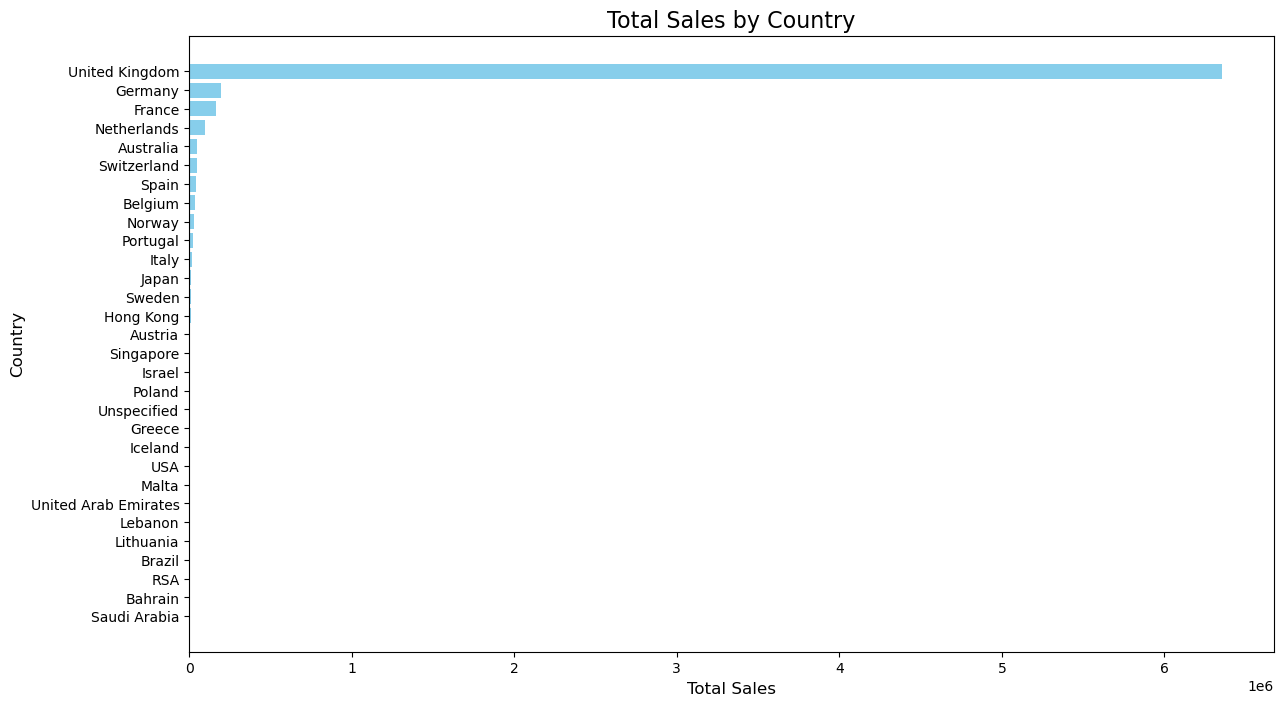

In [57]:
# Grouping by 'Country' to calculate total sales, average sales, and number of transactions
country_sales = df.groupby('Country').agg(
    TotalSales=('TotalPrice', 'sum'),
    AvgSales=('TotalPrice', 'mean'),
    NumTransactions=('BillNo', 'nunique')
).reset_index()

# Sorting by TotalSales in descending order
country_sales = country_sales.sort_values(by='TotalSales', ascending=False)

print("\nCountry-Wise Sales Performance:")
print(country_sales.head())

plt.figure(figsize=(14, 8))
plt.barh(country_sales['Country'], country_sales['TotalSales'], color='skyblue')
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()  # Highest sales at the top
plt.show()


In [58]:
# Extracting the top 5 countries by total sales
top_countries = country_sales.head(5)

print("\nTop 5 Countries by Total Sales:")
print(top_countries)



Top 5 Countries by Total Sales:
           Country   TotalSales   AvgSales  NumTransactions
28  United Kingdom  6356733.574  13.217119            18667
6          Germany   193079.640  21.389126              457
5           France   166256.170  19.808909              392
16     Netherlands    96995.740  41.047711               95
0        Australia    50768.300  42.878632               57


# 7.4 Profit Analysis

In [59]:
# Assuming cost is 70% of Price (adjust percentage as needed)
df['Cost'] = df['Price'] * 0.7

# Profit per unit
df['Profit'] = df['Price'] - df['Cost']

# Calculating Total Revenue and Total Profit for each transaction
df['TotalRevenue'] = df['Quantity'] * df['Price']
df['TotalProfit'] = df['Quantity'] * df['Profit']

print("\nDataset with Cost, Profit, Revenue:")
print(df.head())



Dataset with Cost, Profit, Revenue:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN       6.0 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER       8.0 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE       6.0 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.       6.0 2010-12-01 08:26:00   

   Price CustomerID         Country  Quantity_Log  Price_Log  \
0   2.55    17850.0  United Kingdom      1.945910   1.266948   
1   3.39    17850.0  United Kingdom      1.945910   1.479329   
2   2.75    17850.0  United Kingdom      2.197225   1.321756   
3   3.39    17850.0  United Kingdom      1.945910   1.479329   
4   3.39    17850.0  United Kingdom      1.945910   1.479329   

   Quantity_Outlier  Price_Outlier  TotalPrice  Month    Weekday  Week   Cost  \
0               

In [60]:
# Grouping by Itemname to calculate total revenue, profit, and profit margin
product_performance = df.groupby('Itemname').agg(
    TotalRevenue=('TotalRevenue', 'sum'),
    TotalProfit=('TotalProfit', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()


product_performance['ProfitMargin'] = (product_performance['TotalProfit'] / product_performance['TotalRevenue']) * 100


product_performance = product_performance.sort_values(by='TotalProfit', ascending=False)

print("\nProduct Performance Summary:")
print(product_performance.head())



Product Performance Summary:
                                Itemname  TotalRevenue  TotalProfit  \
2884            REGENCY CAKESTAND 3 TIER     104759.23    31427.769   
2445                       PARTY BUNTING      66887.54    20066.262   
3882  WHITE HANGING HEART T-LIGHT HOLDER      60001.97    18000.591   
1842             JUMBO BAG RED RETROSPOT      46893.52    14068.056   
2414      PAPER CHAIN KIT 50'S CHRISTMAS      36525.23    10957.569   

      TotalQuantity  ProfitMargin  
2884        10621.0          30.0  
2445        12256.0          30.0  
3882        20779.0          30.0  
1842        21944.0          30.0  
2414        11145.0          30.0  


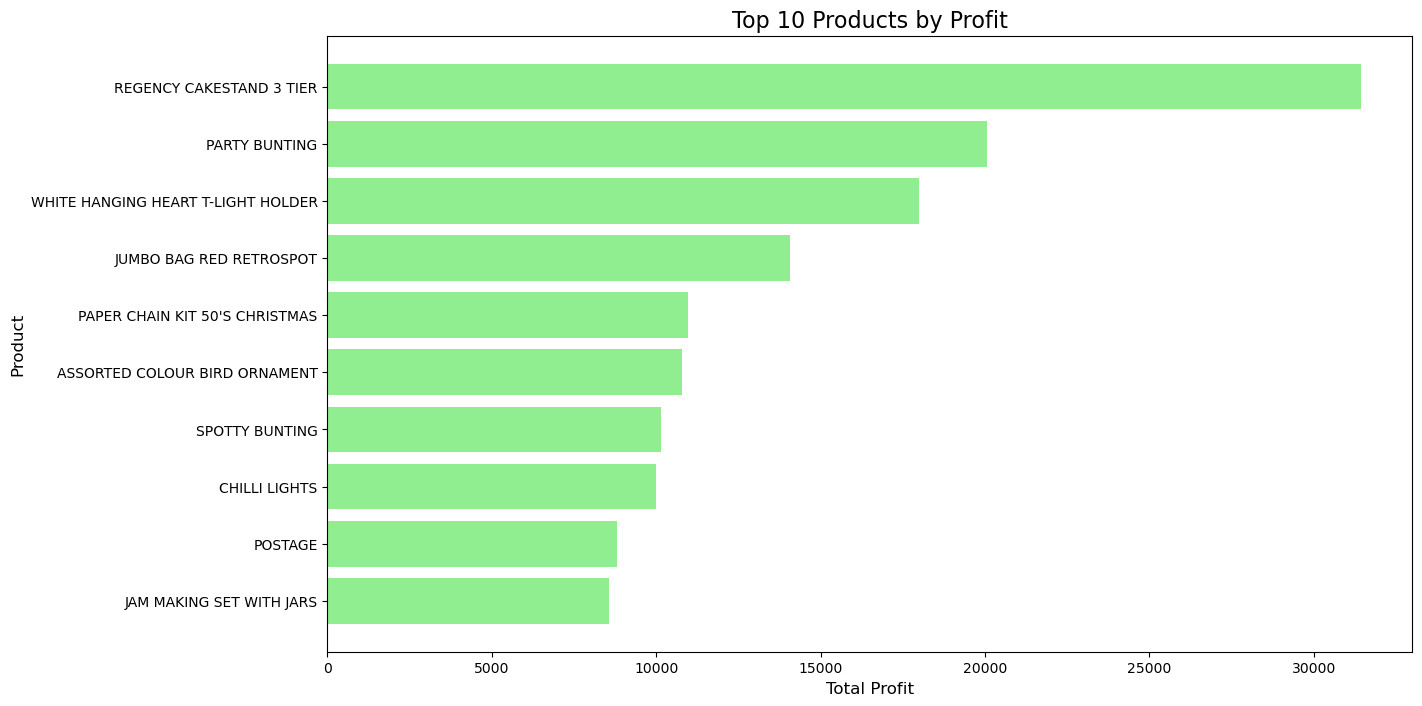

In [61]:
top_products = product_performance.head(10)

plt.figure(figsize=(14, 8))
plt.barh(top_products['Itemname'], top_products['TotalProfit'], color='lightgreen')
plt.title('Top 10 Products by Profit', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()  
plt.show()

# 7.5 Churn Analysis 

In [62]:
# Calculating the number of purchases per customer
customer_purchases = df.groupby('CustomerID').agg(
    PurchaseCount=('BillNo', 'nunique'),  # Number of unique transactions
    TotalSpent=('TotalPrice', 'sum'),     # Total amount spent
    FirstPurchase=('Date', 'min'),        # First purchase date
    LastPurchase=('Date', 'max')          # Last purchase date
).reset_index()

print("\nCustomer Purchase Summary:")
print(customer_purchases.head())


Customer Purchase Summary:
  CustomerID  PurchaseCount  TotalSpent       FirstPurchase  \
0    12346.0              1       29.12 2011-01-18 10:01:00   
1    12347.0              7     3942.88 2010-12-07 14:57:00   
2    12349.0              1     1385.83 2011-11-21 09:51:00   
3    12350.0              1      304.29 2011-02-02 16:01:00   
4    12352.0              8     1469.80 2011-02-16 12:33:00   

         LastPurchase  
0 2011-01-18 10:01:00  
1 2011-12-07 15:52:00  
2 2011-11-21 09:51:00  
3 2011-02-02 16:01:00  
4 2011-11-03 14:37:00  


In [63]:
# Flag customers with more than 1 purchase as repeat customers
customer_purchases['IsRepeatCustomer'] = customer_purchases['PurchaseCount'] > 1

print("\nRepeat Customers Summary:")
print(customer_purchases[['CustomerID', 'IsRepeatCustomer']].head())



Repeat Customers Summary:
  CustomerID  IsRepeatCustomer
0    12346.0             False
1    12347.0              True
2    12349.0             False
3    12350.0             False
4    12352.0              True


In [64]:
# Retention rate
retention_rate = customer_purchases['IsRepeatCustomer'].mean() * 100
print(f"\nRetention Rate: {retention_rate:.2f}%")


Retention Rate: 65.54%


In [65]:
# Churn rate
churn_rate = 100 - retention_rate
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 34.46%


In [66]:
# Extracting month from Date for trend analysis
df['Month'] = df['Date'].dt.to_period('M')

# Calculating the number of repeat and new customers per month
repeat_analysis = df.groupby(['Month', 'CustomerID']).size().reset_index(name='PurchaseCount')
repeat_analysis['IsRepeat'] = repeat_analysis['PurchaseCount'] > 1

# Monthly retention trend
monthly_retention = repeat_analysis.groupby('Month')['IsRepeat'].mean() * 100
print("\nMonthly Retention Rates:")
print(monthly_retention)



Monthly Retention Rates:
Month
2010-12    96.590909
2011-01    96.739130
2011-02    95.727637
2011-03    97.098446
2011-04    97.055359
2011-05    97.333333
2011-06    97.250509
2011-07    97.343252
2011-08    96.436285
2011-09    97.770701
2011-10    98.442136
2011-11    97.883918
2011-12    97.049180
Freq: M, Name: IsRepeat, dtype: float64


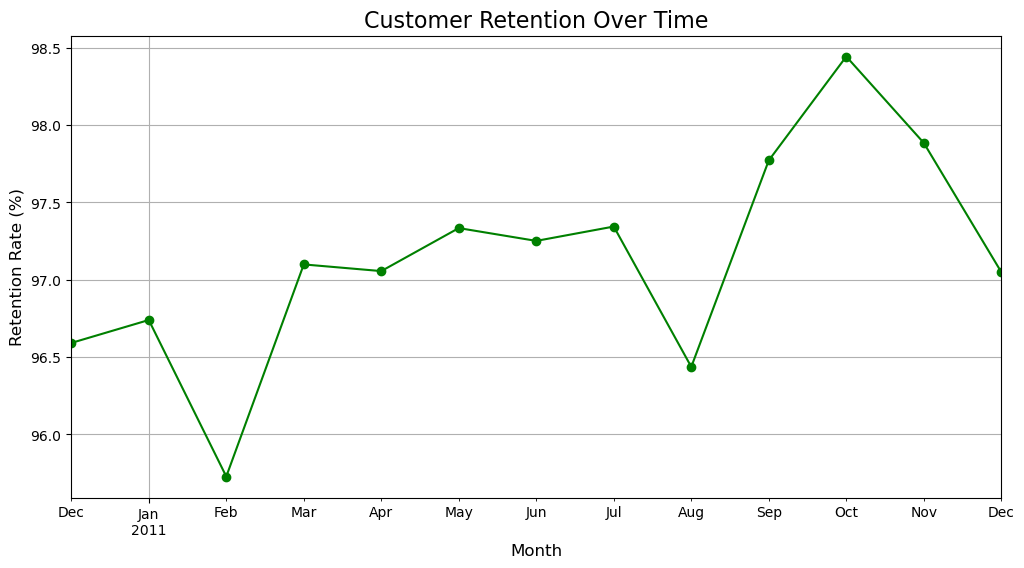

In [67]:
plt.figure(figsize=(12, 6))
monthly_retention.plot(kind='line', marker='o', color='green')
plt.title('Customer Retention Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.grid()
plt.show()


In [68]:
# Filtering repeat customers who spent more than a threshold (e.g., $500)
high_value_customers = customer_purchases[(customer_purchases['IsRepeatCustomer']) & 
                                          (customer_purchases['TotalSpent'] > 500)]

print("\nHigh-Value Repeat Customers:")
print(high_value_customers)


High-Value Repeat Customers:
     CustomerID  PurchaseCount  TotalSpent       FirstPurchase  \
1       12347.0              7     3942.88 2010-12-07 14:57:00   
4       12352.0              8     1469.80 2011-02-16 12:33:00   
8       12356.0              3     2245.35 2011-01-18 09:50:00   
10      12358.0              2      984.16 2011-07-12 10:04:00   
11      12360.0              3     2252.43 2011-05-23 09:43:00   
...         ...            ...         ...                 ...   
4282    18265.0              2      776.69 2011-07-04 15:26:00   
4286    18272.0              6     3003.46 2011-04-07 09:35:00   
4295    18283.0             16     2039.41 2011-01-06 14:14:00   
4296    18287.0              3     1543.84 2011-05-22 10:39:00   
4297      Guest           2045  1249807.53 2010-12-01 14:32:00   

            LastPurchase  IsRepeatCustomer  
1    2011-12-07 15:52:00              True  
4    2011-11-03 14:37:00              True  
8    2011-11-17 08:40:00              True

In [69]:
# Filtering repeat customers who spent more than a threshold (e.g., $500)
high_value_customers = customer_purchases[(customer_purchases['IsRepeatCustomer']) & 
                                          (customer_purchases['TotalSpent'] > 500)]

print("\nHigh-Value Repeat Customers:")
print(high_value_customers)


High-Value Repeat Customers:
     CustomerID  PurchaseCount  TotalSpent       FirstPurchase  \
1       12347.0              7     3942.88 2010-12-07 14:57:00   
4       12352.0              8     1469.80 2011-02-16 12:33:00   
8       12356.0              3     2245.35 2011-01-18 09:50:00   
10      12358.0              2      984.16 2011-07-12 10:04:00   
11      12360.0              3     2252.43 2011-05-23 09:43:00   
...         ...            ...         ...                 ...   
4282    18265.0              2      776.69 2011-07-04 15:26:00   
4286    18272.0              6     3003.46 2011-04-07 09:35:00   
4295    18283.0             16     2039.41 2011-01-06 14:14:00   
4296    18287.0              3     1543.84 2011-05-22 10:39:00   
4297      Guest           2045  1249807.53 2010-12-01 14:32:00   

            LastPurchase  IsRepeatCustomer  
1    2011-12-07 15:52:00              True  
4    2011-11-03 14:37:00              True  
8    2011-11-17 08:40:00              True

In [70]:
import datetime as dt

snapshot_date = df['Date'].max() 
customer_purchases['Recency'] = (snapshot_date - customer_purchases['LastPurchase']).dt.days
customer_purchases['Frequency'] = customer_purchases['PurchaseCount']
customer_purchases['Monetary'] = customer_purchases['TotalSpent']

print("\nRFM Metrics for Customers:")
print(customer_purchases[['CustomerID', 'Recency', 'Frequency', 'Monetary']].head())



RFM Metrics for Customers:
  CustomerID  Recency  Frequency  Monetary
0    12346.0      325          1     29.12
1    12347.0        1          7   3942.88
2    12349.0       18          1   1385.83
3    12350.0      309          1    304.29
4    12352.0       35          8   1469.80


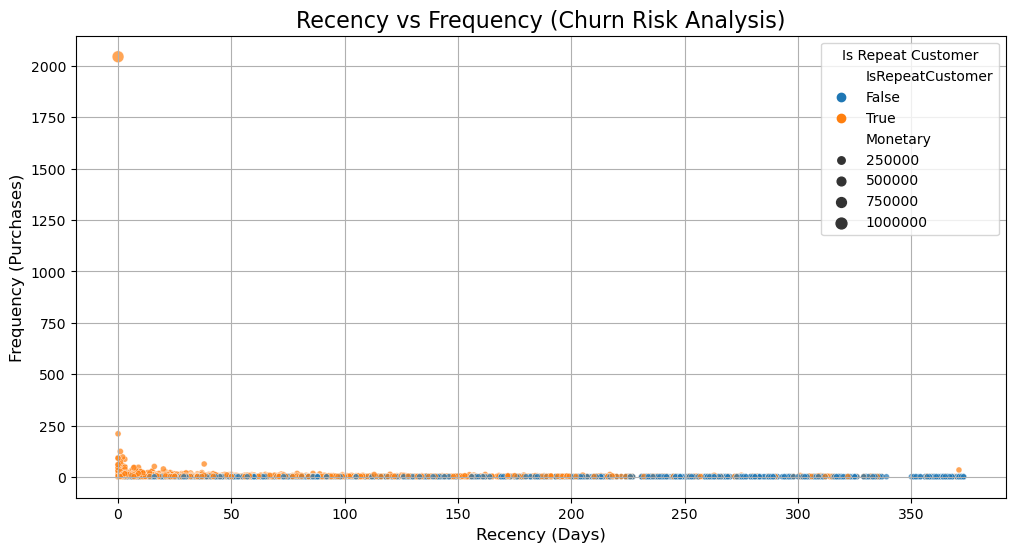

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Frequency', size='Monetary', data=customer_purchases, hue='IsRepeatCustomer', alpha=0.7)
plt.title('Recency vs Frequency (Churn Risk Analysis)', fontsize=16)
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Frequency (Purchases)', fontsize=12)
plt.legend(title='Is Repeat Customer', loc='upper right')
plt.grid()
plt.show()

In [72]:
df.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Quantity_Log,Price_Log,Quantity_Outlier,Price_Outlier,TotalPrice,Month,Weekday,Week,Cost,Profit,TotalRevenue,TotalProfit
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.945910,1.266948,0,0,15.30,2010-12,Wednesday,48,1.785,0.765,15.30,4.590
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2.197225,1.321756,0,0,22.00,2010-12,Wednesday,48,1.925,0.825,22.00,6.600
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.945910,1.479329,0,0,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102


In [73]:
df = df.drop(columns=['Quantity_Log', 'Price_Log', 'Quantity_Outlier', 'Price_Outlier'])


In [74]:
df.head(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,TotalPrice,Month,Weekday,Week,Cost,Profit,TotalRevenue,TotalProfit
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday,48,1.785,0.765,15.30,4.590
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday,48,1.925,0.825,22.00,6.600
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,48,2.373,1.017,20.34,6.102


In [75]:
pip install openpyxl

In [76]:
cleaned_df = df.copy() 

In [87]:
cleaned_df.dropna(inplace=True) 


In [89]:
cleaned_df.to_excel("cleaned_dataset.xlsx", index=False, sheet_name="Cleaned Data")
print("Dataset exported successfully!")


Dataset exported successfully!


In [79]:
import pandas as pd

# Assuming df is already loaded with the dataset
# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the week and year for grouping
df['week'] = df['Date'].dt.isocalendar().week
df['year'] = df['Date'].dt.year

# Group by year and week, summing the revenue
weekly_revenue = df.groupby(['year', 'week'])['TotalRevenue'].sum().reset_index()

# Find the peak and lowest revenue weeks
peak_week = weekly_revenue.loc[weekly_revenue['TotalRevenue'].idxmax()]
lowest_week = weekly_revenue.loc[weekly_revenue['TotalRevenue'].idxmin()]

# Display the results
print("Peak Week:", peak_week)
print("Lowest Week:", lowest_week)


Peak Week: year               2011.0
week                 46.0
TotalRevenue    262750.82
Name: 49, dtype: Float64
Lowest Week: year              2010.0
week                51.0
TotalRevenue    60043.53
Name: 3, dtype: Float64
